<a href="https://colab.research.google.com/github/yunhui666/Kaggle_NYC_Taxi_Duration_Prediction_Project/blob/main/NYCTaxi_BeforeModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd desktop

/Users/yunhuizhao/Desktop


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as tick
from matplotlib import pyplot as plt
%matplotlib inline 

In [ ]:
sns.set(font_scale=1.4)

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,3/14/16 17:24,3/14/16 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,6/12/16 0:43,6/12/16 0:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,1/19/16 11:35,1/19/16 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,4/6/16 19:32,4/6/16 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,3/26/16 13:30,3/26/16 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1048575 non-null  object 
 1   vendor_id           1048575 non-null  int64  
 2   pickup_datetime     1048575 non-null  object 
 3   dropoff_datetime    1048575 non-null  object 
 4   passenger_count     1048575 non-null  int64  
 5   pickup_longitude    1048575 non-null  float64
 6   pickup_latitude     1048575 non-null  float64
 7   dropoff_longitude   1048575 non-null  float64
 8   dropoff_latitude    1048575 non-null  float64
 9   store_and_fwd_flag  1048575 non-null  object 
 10  trip_duration       1048575 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 88.0+ MB


In [ ]:
#data exploration(catgorical variable)
#vendor_id 
#plt.figure(figsize=(8,8))
#sns.countplot(df['vendor_id'], palette='Set3')
#plt.title("Vendor ID")
#Store & Forward flag
#plt.figure(figsize=(8,8))
#plt.pie(df['store_and_fwd_flag'].value_counts(), colors=['lightgreen', 'lightcoral'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
#plt.legend(labels=['Y','N'])
#plt.title("Store and Forward Flag")
#convert these two categorical varibale into label encoded
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['store_and_fwd_flag'] = enc.fit_transform(df['store_and_fwd_flag'])
df['vendor_id'] = enc.fit_transform(df['vendor_id'])
df['store_and_fwd_flag'].value_counts(dropna = False)
df['vendor_id'].value_counts(dropna = False)

1    560466
0    488109
Name: vendor_id, dtype: int64

Text(0.5, 1.0, 'Passenger Count Distribution')

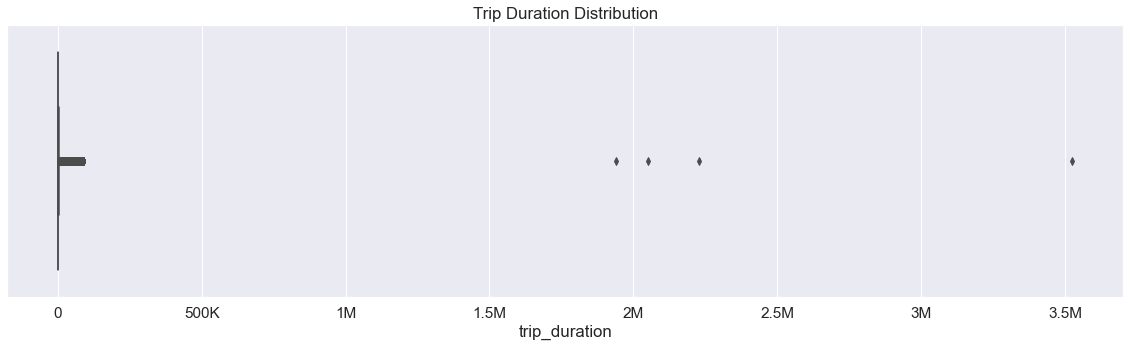

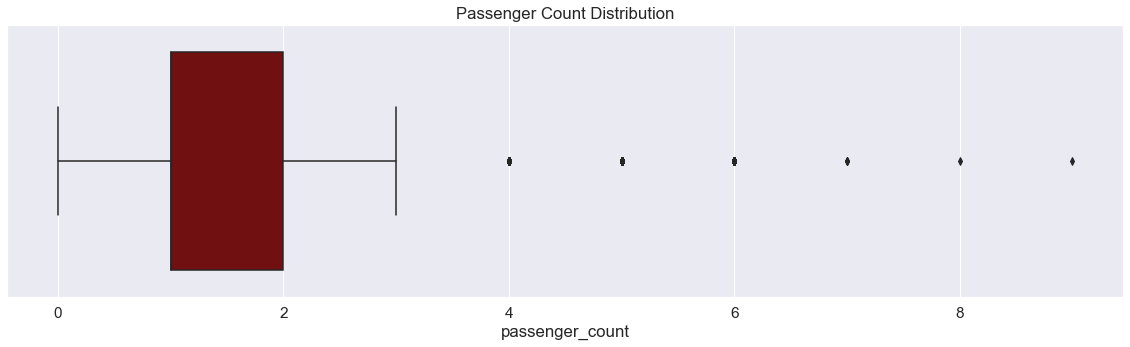

In [ ]:
#data exploration(trip_duration,passager_count)
from matplotlib.ticker import ScalarFormatter
y_formatter = ScalarFormatter(useOffset=False)
ax.yaxis.set_major_formatter(y_formatter)

plt.figure(figsize=(20,5))
sns.boxplot(df['trip_duration'])
plt.title('Trip Duration Distribution')
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

plt.figure(figsize=(20,5))
sns.boxplot(df['passenger_count'], color='maroon')
plt.title('Passenger Count Distribution')

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

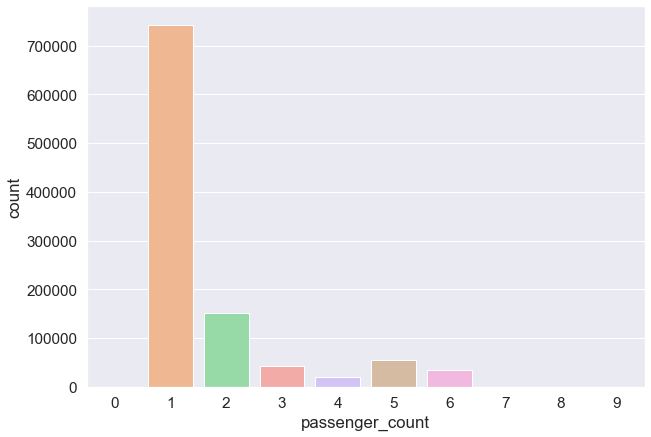

In [ ]:
#passenger count
plt.figure(figsize=(10,7))
sns.countplot(df['passenger_count'], palette='pastel')

(1048575, 11)
(1047048, 11)


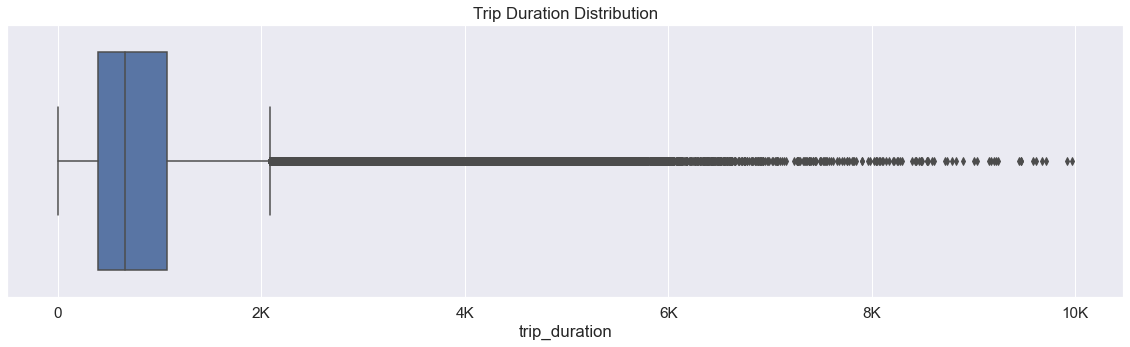

In [ ]:
#Data cleaning-deal with outliers(trip_duration)-boxplot
#10000seconds = 2.7h
df.shape
print(nytaxi.shape)
df2 = df[(df.trip_duration <10000)]
print(df2.shape)
plt.figure(figsize=(20,5))
sns.boxplot(df2['trip_duration'])
plt.title('Trip Duration Distribution')
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

In [ ]:
#convert datetime to day,month,hour,min,weekday
df2['pickup_datetime'] = pd.to_datetime(df2['pickup_datetime'])
df2['dropoff_datetime'] = pd.to_datetime(df2['dropoff_datetime'])

df2['pickup_day'] = df2['pickup_datetime'].dt.day
df2['pickup_month'] = df2['pickup_datetime'].dt.month
df2['pickup_date'] = df2['pickup_datetime'].dt.date
df2['pickup_hour'] = df2['pickup_datetime'].dt.hour
df2['pickup_min'] = df2['pickup_datetime'].dt.minute
df2['pickup_weekday'] = df2['pickup_datetime'].dt.weekday

df2['dropoff_min'] = df2['dropoff_datetime'].dt.minute

In [ ]:
df3 = df2.drop(columns = ['pickup_datetime','dropoff_datetime'])
df3

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_date,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,id2875421,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455,14,3,2016-03-14,17,24,0,32
1,id2377394,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663,12,6,2016-06-12,0,43,6,54
2,id3858529,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,19,1,2016-01-19,11,35,1,10
3,id3504673,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429,6,4,2016-04-06,19,32,2,39
4,id2181028,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435,26,3,2016-03-26,13,30,5,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,id0002921,0,1,-73.973015,40.760948,-73.976387,40.755604,0,207,6,4,2016-04-06,14,16,2,20
1048571,id1329189,1,1,-73.985550,40.727257,-73.957039,40.712387,0,740,24,3,2016-03-24,1,26,3,38
1048572,id0408460,0,1,-73.972038,40.750202,-73.998360,40.733360,0,605,23,2,2016-02-23,16,38,1,48
1048573,id0147762,0,1,-73.993332,40.724342,-74.004250,40.707470,0,287,24,5,2016-05-24,7,20,1,25


In [ ]:
#monthly trips exploration
month_trip=df3.groupby(['pickup_month'])["trip_duration"].agg(["sum","mean","count"])
month_trip=month_trip.reset_index() 
month_trip.rename(columns={'sum':'month_sum_trip_dur','mean':'month_avg_trip_dur','count':"month_trip_times"}, inplace = True)
month_trip

,pickup_month,month_sum_trip_dur,month_avg_trip_dur,month_trip_times
0,1,130146100,789.429277,164861
1,2,135301820,789.544195,171367
2,3,150488505,818.463917,183867
3,4,153027360,846.919590,180687
4,5,157369102,882.519443,178318
5,6,149549410,890.450675,167948


Text(0.5, 0, 'Pickup_Month')

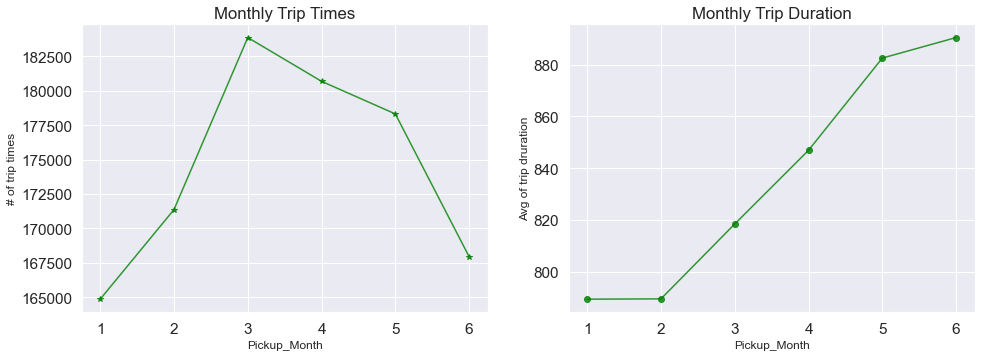

In [ ]:
#monthly trips exploration

plt.figure(figsize=(16,18))

plt.subplot(321)
ax1= plt.plot(month_trip.pickup_month,month_trip.month_trip_times, color="green", alpha=0.8, label='trip times',marker='*')
plt.title("Monthly Trip Times")
plt.ylabel('# of trip times', fontsize=12)
plt.xlabel('Pickup_Month', fontsize=12)

plt.subplot(322)
ax2= plt.plot(month_trip.pickup_month, month_trip.month_avg_trip_dur, color="green",alpha=0.8,marker='o')
plt.title("Monthly Trip Duration")
plt.ylabel('Avg of trip druration', fontsize=12)
plt.xlabel('Pickup_Month', fontsize=12)

Text(0.5, 0, 'Pickup_Hour')

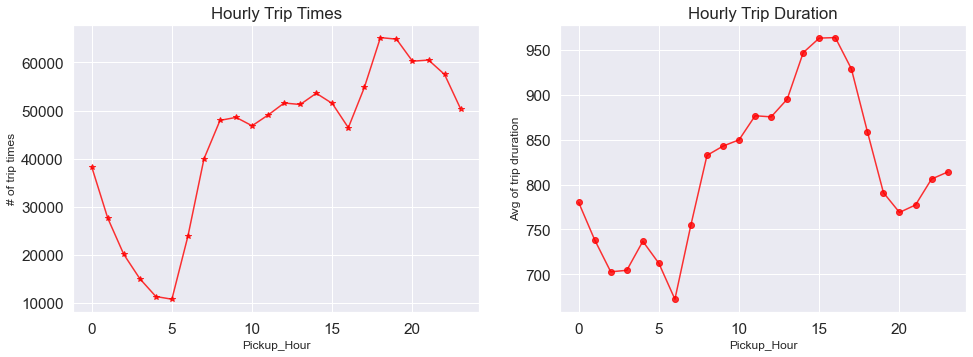

In [ ]:
#Analyzing hourly pickups
hour_trip=df3.groupby(['pickup_hour'])["trip_duration"].agg(["sum","mean","count"])
hour_trip=hour_trip.reset_index() 
hour_trip.rename(columns={'sum':'hour_sum_trip_duration','mean':'hour_avg_trip_dur','count':"hour_trip_times"}, inplace = True)
hour_trip.head()

plt.figure(figsize=(16,18))

plt.subplot(321)
ax1= plt.plot(hour_trip.pickup_hour,hour_trip.hour_trip_times, color="red", alpha=0.8, label='trip times',marker='*')
plt.title("Hourly Trip Times")
plt.ylabel('# of trip times', fontsize=12)
plt.xlabel('Pickup_Hour', fontsize=12)

plt.subplot(322)
ax2= plt.plot(hour_trip.pickup_hour, hour_trip.hour_avg_trip_dur, color="red",alpha=0.8,marker='o')
plt.title("Hourly Trip Duration")
plt.ylabel('Avg of trip druration', fontsize=12)
plt.xlabel('Pickup_Hour', fontsize=12)

Text(0.5, 0, 'Pickup_Weekday')

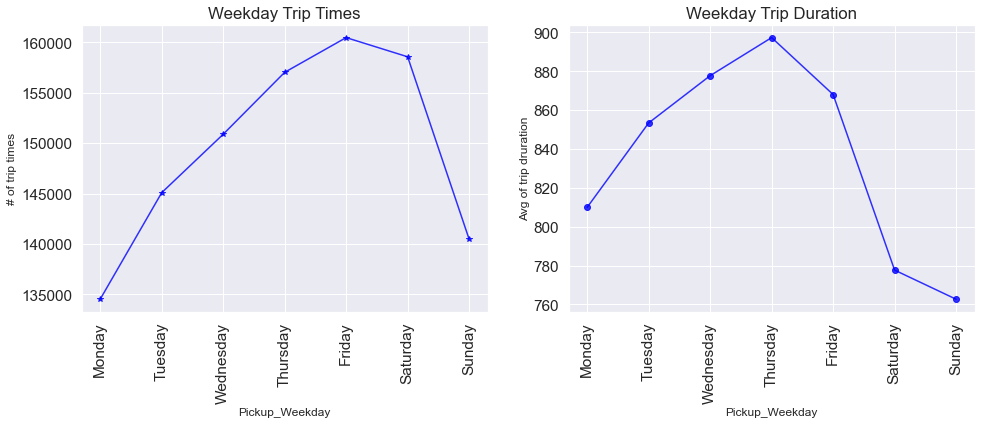

In [ ]:
#Analyzing week day trips
weekday_trip=df3.groupby(['pickup_weekday'])["trip_duration"].agg(["sum","mean","count"])
weekday_trip=weekday_trip.reset_index() 
weekday_trip.rename(columns={'sum':'weekday_sum_trip_duration','mean':'weekday_avg_trip_dur','count':"weekday_trip_times"}, inplace = True)
weekday_trip.head()

plt.figure(figsize=(16,18))

plt.subplot(321)
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=90)
ax1= plt.plot(weekday_trip.pickup_weekday,weekday_trip.weekday_trip_times, color="blue", alpha=0.8, label='trip times',marker='*')
plt.title("Weekday Trip Times")
plt.ylabel('# of trip times', fontsize=12)
plt.xlabel('Pickup_Weekday', fontsize=12)

plt.subplot(322)
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=90)
ax2= plt.plot(weekday_trip.pickup_weekday, weekday_trip.weekday_avg_trip_dur, color="blue",alpha=0.8,marker='o')
plt.title("Weekday Trip Duration")
plt.ylabel('Avg of trip druration', fontsize=12)
plt.xlabel('Pickup_Weekday', fontsize=12)

Text(0.5, 0, 'Pickup_Date')

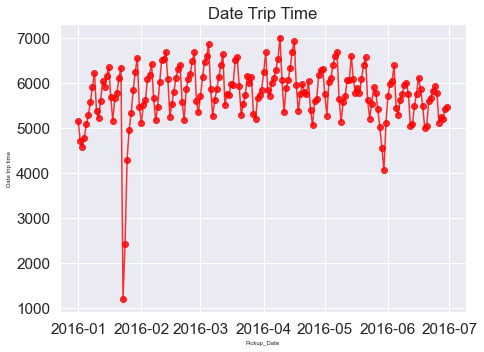

In [ ]:
#Analyzing date trips
date_trip=df3.groupby(['pickup_date'])["trip_duration"].agg(["sum","mean","count"])
date_trip=date_trip.reset_index() 
date_trip.rename(columns={'sum':'date_sum_trip_duration','mean':'date_avg_trip_dur','count':"date_trip_times"}, inplace = True)
date_trip.head()

plt.figure(figsize=(16,18))

plt.subplot(321)
ax2= plt.plot(date_trip.pickup_date, date_trip.date_trip_times, color="red", alpha=0.8,marker='o')
plt.title("Date Trip Time")
plt.ylabel('Date trip time', fontsize=6)
plt.xlabel('Pickup_Date', fontsize=6)

Text(0.5, 1.0, 'Correlation Plot')

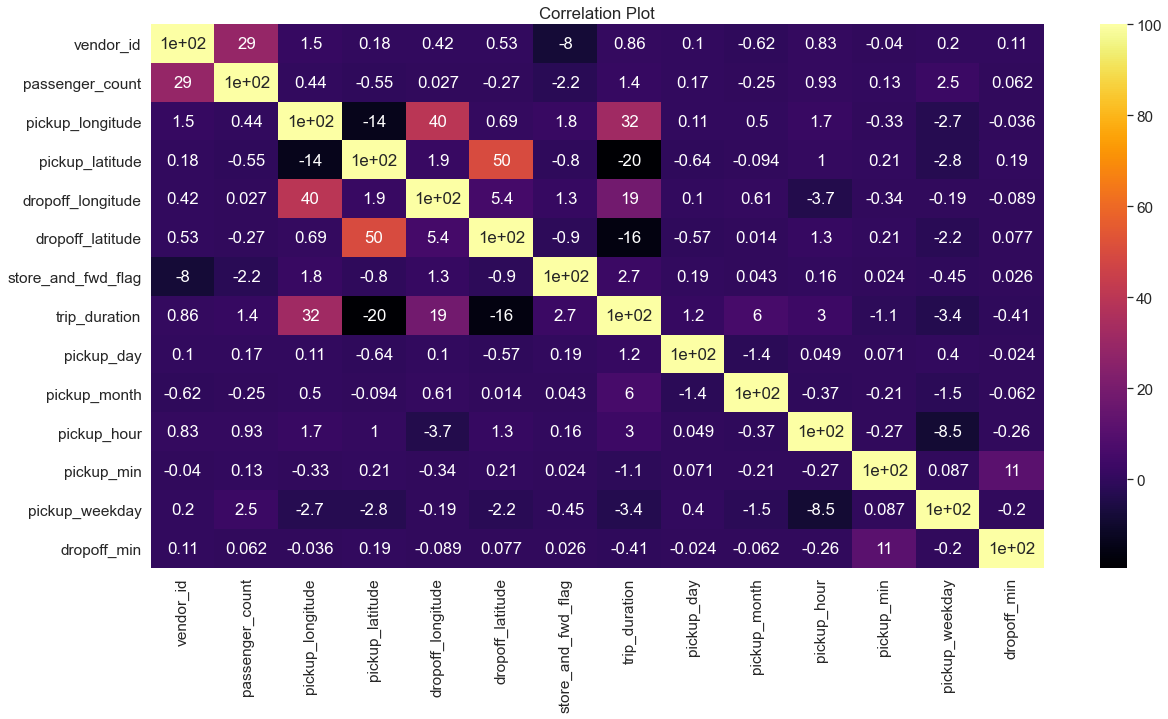

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df3.corr()*100, annot=True, cmap='inferno')
plt.title('Correlation Plot')

In [ ]:
df4 = df3.drop(['id','pickup_date'], axis=1)
df4.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455,14,3,17,24,0,32
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663,12,6,0,43,6,54
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,19,1,11,35,1,10
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429,6,4,19,32,2,39
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435,26,3,13,30,5,38


In [ ]:
#Predictors and Target Variable

x = df4.drop(['trip_duration'], axis=1)
y = np.log(df4['trip_duration'])

# Normalising Predictors and creating new dataframe

from sklearn.preprocessing import StandardScaler

cols = x.columns

ss = StandardScaler()

new_df = ss.fit_transform(x)
new_df = pd.DataFrame(new_df, columns=cols)
new_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,0.934465,-0.505314,-0.204130,0.502568,0.204394,0.377686,-0.074692,-0.172148,-0.306898,0.529923,-0.322749,-1.561865,0.136040
1,-1.070131,-0.505314,-0.163456,-0.366397,-0.611076,-0.567487,-0.074692,-0.401942,1.478050,-2.126300,0.773855,1.508637,1.398873
2,0.934465,-0.505314,-0.130989,0.384298,-0.747999,-1.145413,-0.074692,0.402337,-1.496864,-0.407567,0.312127,-1.050114,-1.126792
3,0.934465,-0.505314,-0.856154,-0.916440,-0.910272,-1.237826,-0.074692,-1.091323,0.288085,0.842420,0.138979,-0.538364,0.537851
4,0.934465,-0.505314,0.008692,1.250215,0.010345,0.841847,-0.074692,1.206615,-0.306898,-0.095071,0.023547,0.996887,0.480449
